### Task 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split as tts 
import shap
shap.initjs()

c:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Task 2: Preparing the Dataset

Load the dataset

In [2]:
df = pd.read_csv("census.csv/census.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Standardize the numeric columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
numeric_columns = df.select_dtypes(include=["number"])
scaler= StandardScaler()
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,Private,0.351675,11th,-1.197259,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.144804,-0.217127,-0.034087,United-States,<=50K
1,-0.046942,Private,-0.945524,HS-grad,-0.419335,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.144804,-0.217127,0.772930,United-States,<=50K
2,-0.776316,Local-gov,1.394723,Assoc-acdm,0.747550,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.144804,-0.217127,-0.034087,United-States,>50K
3,0.390683,Private,-0.277844,Some-college,-0.030373,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.886874,-0.217127,-0.034087,United-States,>50K
4,-1.505691,?,-0.815954,Some-college,-0.030373,Never-married,?,Own-child,White,Female,-0.144804,-0.217127,-0.841104,United-States,<=50K


One-hot-encode the categorical features

In [5]:
categorical_columns = []
for cols in df.columns:
    if cols not in numeric_columns:
        if cols!="INCOME":
            categorical_columns.append(cols)

categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [6]:
df_encoded= pd.get_dummies(df, columns= categorical_columns)
df_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False


Encode the target feature

In [8]:
le = LabelEncoder()
df_encoded["income"] = le.fit_transform(df["income"])
df_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K,income
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,True,False,False,True,False,0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,False,False,False,False,...,False,False,False,False,True,False,False,True,False,0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,False,False,True,False,...,False,False,False,False,True,False,False,False,True,1
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,True,False,False,False,True,1
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,True,False,False,False,...,False,False,False,False,True,False,False,True,False,0


Split the dataset into `X` and `y`

In [9]:
y = df_encoded["income"]
df_encoded.drop(columns=["income"], inplace=True)
X=df_encoded

In [11]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.640492,0.747550,-0.144804,-0.217127,-0.195490,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48838,0.098933,-0.334178,-0.419335,-0.144804,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
48839,1.411808,-0.357510,-0.419335,-0.144804,-0.217127,-0.034087,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48840,-1.213941,0.111984,-0.419335,-0.144804,-0.217127,-1.648120,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


### Task 3: Explain a Logistic Regression Model

Instantiate and fit the `LogisticRegression()` model

In [12]:
lr = LogisticRegression(max_iter=30, random_state=42)
lr.fit(X,y)


c:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=30, random_state=42)

Extract model coefficients

In [13]:
coefficients = lr.coef_[0]

Plot the top ten coefficients

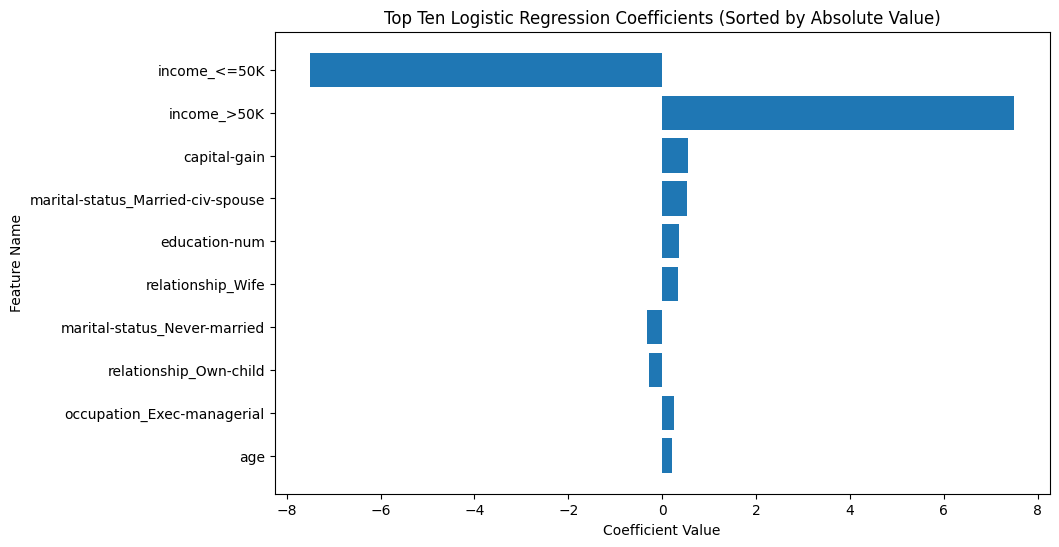

In [14]:
feature_names = list(X.columns)
coef_feature_pairs = list(zip(coefficients, feature_names))
sorted_coef_feature_pairs = sorted(coef_feature_pairs, key=lambda x: abs(x[0]), 
reverse=True)
sorted_coefficients, sorted_feature_names = zip(*sorted_coef_feature_pairs)
top_ten_coefficients = sorted_coefficients[:10]
top_ten_feature_names = sorted_feature_names[:10]

plt.figure(figsize=(10, 6))
plt.barh(top_ten_feature_names, top_ten_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Top Ten Logistic Regression Coefficients (Sorted by Absolute Value)')
plt.gca().invert_yaxis() 
plt.show()

### Task 4: Explain Random Forest Model

Instantiate and fit the `RandomForest()` model

In [15]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2 , min_samples_leaf=2, max_depth=40, criterion="entropy")
rf.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_leaf=2)

Extract the feature importances

In [16]:
feat_imp = rf.feature_importances_
feat_imp

array([1.38580532e-02, 1.34710102e-03, 2.07234186e-02, 2.94896311e-02,
       4.42654883e-03, 7.04073114e-03, 2.67099334e-04, 1.80983774e-04,
       1.41049550e-04, 0.00000000e+00, 2.69267717e-04, 8.89978624e-04,
       2.86480693e-04, 1.05486571e-04, 0.00000000e+00, 1.92118410e-04,
       3.39636279e-04, 4.16121953e-05, 1.24509578e-05, 1.08467994e-04,
       4.43367435e-04, 1.97798662e-04, 1.01071035e-04, 8.38657691e-05,
       3.04726778e-03, 6.65393127e-04, 2.26894187e-03, 9.52473441e-04,
       6.07174606e-06, 1.41650104e-03, 2.45848933e-04, 1.89764063e-03,
       3.39699743e-05, 3.01746344e-02, 3.94252150e-05, 1.64727423e-02,
       2.03303918e-04, 1.20428529e-04, 3.98155634e-04, 2.55608086e-04,
       8.09031811e-09, 2.65660933e-04, 2.38537896e-03, 2.25425290e-04,
       2.08856466e-04, 3.06810764e-04, 2.29607200e-03, 1.00938528e-05,
       4.62199884e-03, 8.77988341e-05, 2.27424841e-04, 1.23015273e-04,
       1.55241918e-04, 1.97898697e-02, 6.80767739e-03, 3.56600225e-04,
      

Plot the feature importances

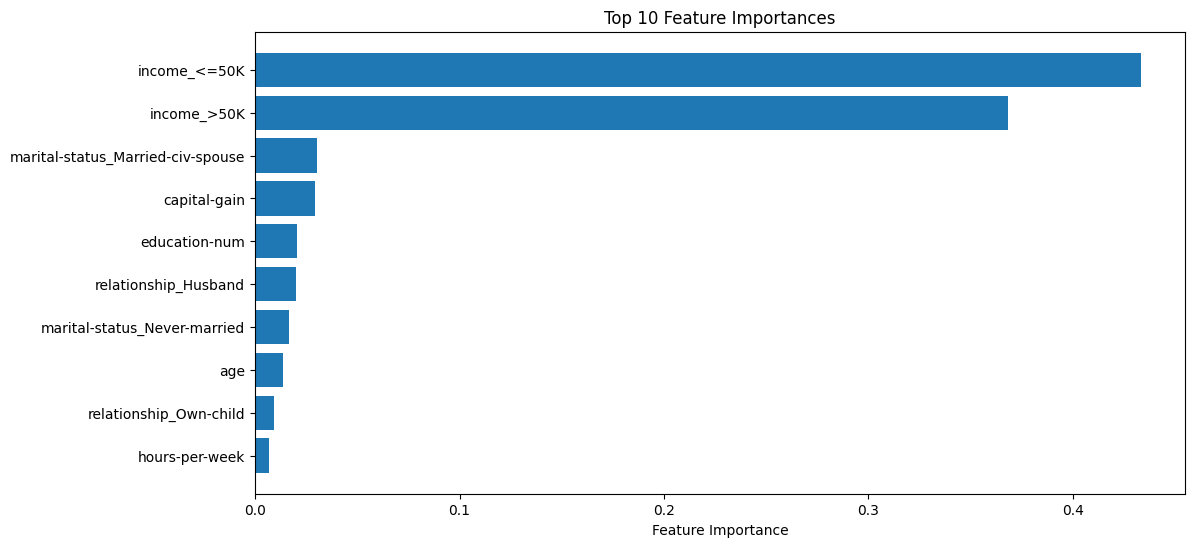

In [17]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feat_imp})
feature_importance_df = feature_importance_df.sort_values(by='Importance', 
ascending=False)
top_n = 10   

plt.figure(figsize=(12, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top {} Feature Importances'.format(top_n))
plt.gca().invert_yaxis()  
plt.show()

### Task 5: Explain Neural Network Model

Split the dataset into `X` and `y`

In [18]:
X_train,X_test, y_train, y_test = tts(X, y, test_size=20, random_state=42)

Instantiate and fit the `MLPClassifier()` model

In [19]:
nn_classifier = MLPClassifier()
nn_classifier.fit(X_train, y_train)

MLPClassifier()

Calculate the permutation importances

In [20]:
perm_importance = permutation_importance(nn_classifier, X_test, y_test, random_state=42)

Plot the feature importances

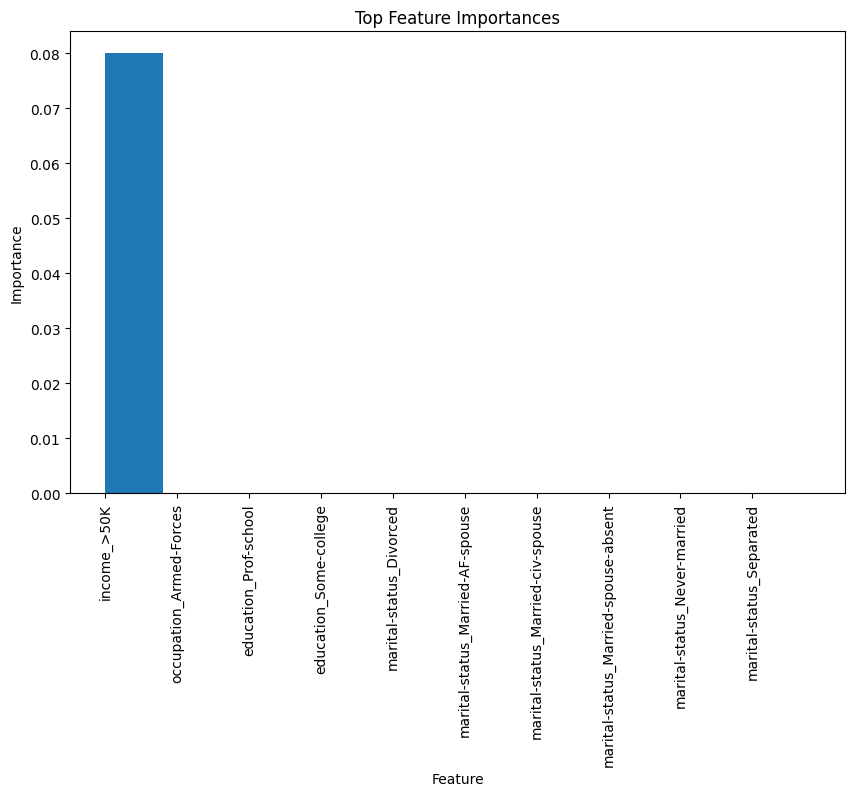

In [21]:
feature_importances = perm_importance.importances_mean
sorted_idx = feature_importances.argsort()[::-1]
feature_names = X.columns
top_n = 10

plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align="edge")
plt.xticks(range(top_n), [feature_names[i] for i in sorted_idx[:top_n]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top Feature Importances")
plt.show()

### Task 6: SHAP for Local Explanations

Create shap Explainer instance 

In [22]:
explainer = shap.Explainer(rf)

Compute shap values on entire dataset

In [23]:
shap_values = explainer(X[:100])

Select individual row and predict the output

In [26]:
rf.predict_proba(X)[24]

array([0.97606565, 0.02393435])

Plot shap values to explain the selected individual

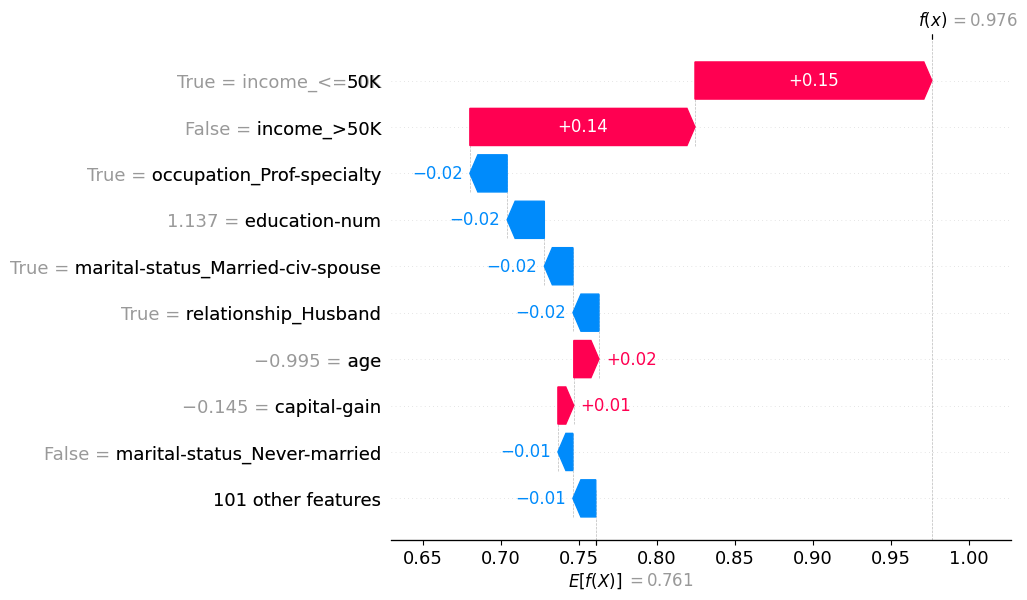

In [28]:
shap.plots.waterfall(shap_values[24,:,0])